In [1]:
"""Inspect result of ray_pipeline for the cryo_exp dataset"""

'Inspect result of ray_pipeline for the cryo_exp dataset'

In [30]:
import csv
import functools
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import torch
import ray
import sys

from ray.tune.analysis import Analysis

In [44]:
!which python; python -V;

/opt/rh/rh-python36/root/usr/bin/python
Python 3.6.3


In [4]:
sys.path.append('/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree')
print(sys.path)

['/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ray/pyarrow_files', '', '/opt/rh/devtoolset-6/root/usr/lib64/python2.7/site-packages', '/opt/rh/devtoolset-6/root/usr/lib/python2.7/site-packages', '/opt/rh/rh-python36/root/usr/lib64/python36.zip', '/opt/rh/rh-python36/root/usr/lib64/python3.6', '/opt/rh/rh-python36/root/usr/lib64/python3.6/lib-dynload', '/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/extensions', '/home/nmiolane/.ipython']


In [77]:
CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if CUDA else "cpu")

MAIN_DIR = '/gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp'

In [159]:
analysis_path = os.path.join(MAIN_DIR)
analysis = Analysis(analysis_path)

best_logdir = analysis.get_best_logdir(metric="average_loss", mode='min')
print("Best logdir is", best_logdir)
OUTPUT = best_logdir

Best logdir is /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_44_beta1=0.60835,beta2=0.91506,latent_dim=20,lr=0.0005_2019-11-03_12-49-07zpj4_zg5


In [102]:
DATA_DIR = '/gpfs/slac/cryo/fs1/u/nmiolane/data/cryo'
DATA_TYPE = 'cryo_exp'

IMG_SHAPE = (128, 128)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s.npy' % (
        DATA_TYPE, SHAPE_STR))
DATASET = np.load(DATASET_PATH)

LABELS_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_labels_%s.csv' % (
        DATA_TYPE, SHAPE_STR))

CMAP = 'gray'

SUB_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_%s.npy' % (
        DATA_TYPE, SHAPE_STR))

SUB_LABELS_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_labels_%s.npy' % (
        DATA_TYPE, SHAPE_STR))

In [130]:
N_SUB = 1000
SUB_DATASET = DATASET[:N_SUB]
np.save(SUB_DATASET_PATH, SUB_DATASET)

In [131]:
sublabels = analyze.get_cryo_labels(labels_path=LABELS_PATH, from_id=1, to_id=N_SUB)
all_focuses = sublabels['focus']
all_thetas = sublabels['theta']
with open(sub_labels_path, 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['focus', 'theta'])
    for focus, theta in zip(all_focuses, all_thetas):
        writer.writerow([focus, theta])

In [132]:
len(sublabels['focus'])

1000

# Show original data

Loading /gpfs/slac/cryo/fs1/u/nmiolane/data/cryo/train_val_datasets/sub_cryo_exp_128x128.npy
Dataset shape: (2000, 1, 128, 128)


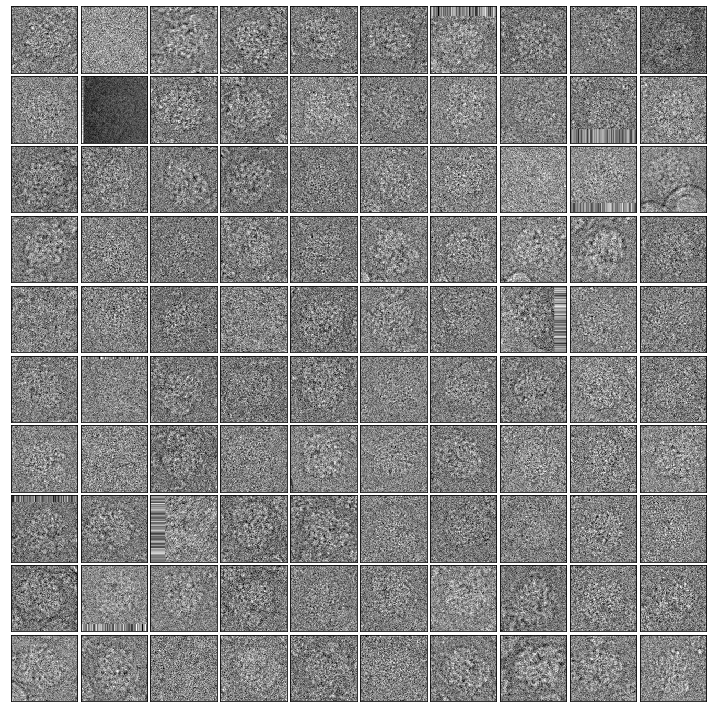

In [122]:
vis.show_data(SUB_DATASET_PATH, nrows=10, ncols=10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.051, wspace=0.05)

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoin

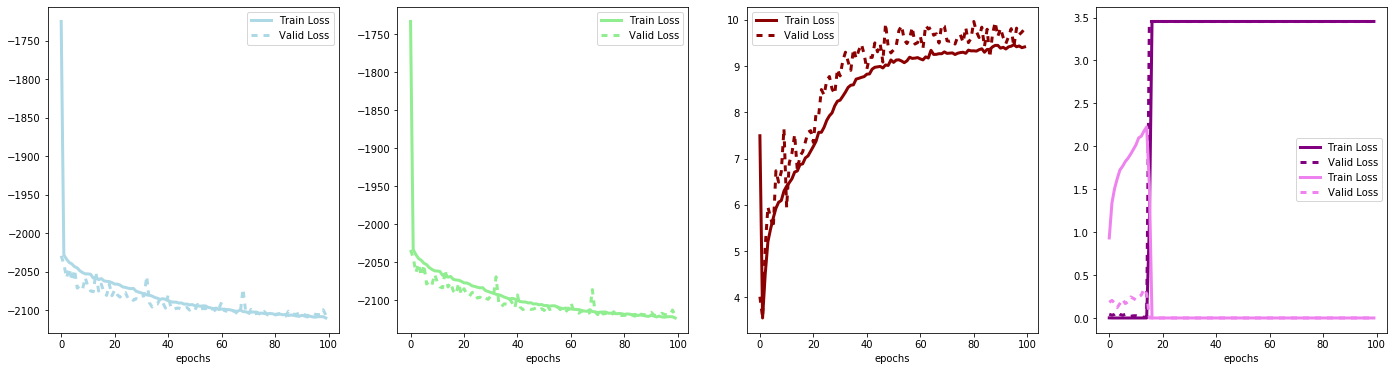

In [104]:
vis.plot_losses(OUTPUT)

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_44_beta1=0.60835,beta2=0.91506,latent_dim=20,lr=0.0005_2019-11-03_12-49-07zpj4_zg5/checkpoint_64/epoch_64_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_44_beta1=0.60835,beta2=0.91506,latent_dim=20,lr=0.0005_2019-11-03_12-49-07zpj4_zg5/checkpoint_64/epoch_64_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...


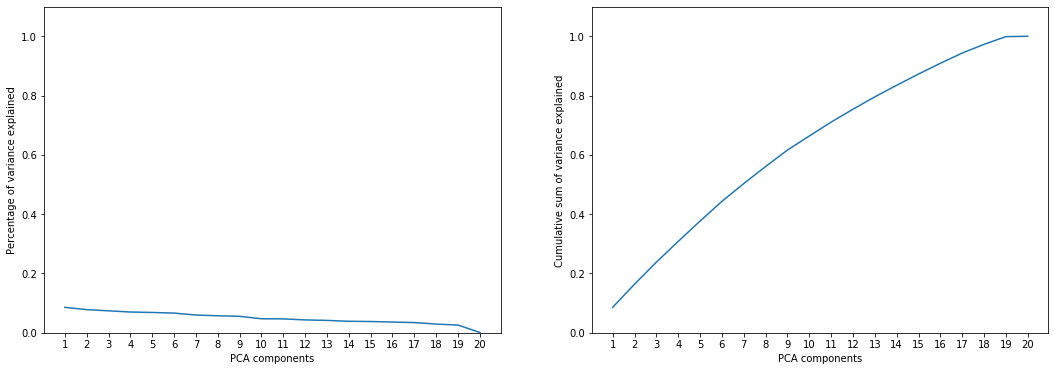

In [160]:
ax = vis.plot_variance_explained(OUTPUT, SUB_DATASET_PATH)

In [133]:
_, labels = analyze.get_cryo(OUTPUT, SUB_DATASET_PATH, SUB_LABELS_PATH)

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_1_beta1=0.77379,beta2=0.95268,lr=0.0005_2019-11-03_09-46-592bhl25y8/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(1000, 3)


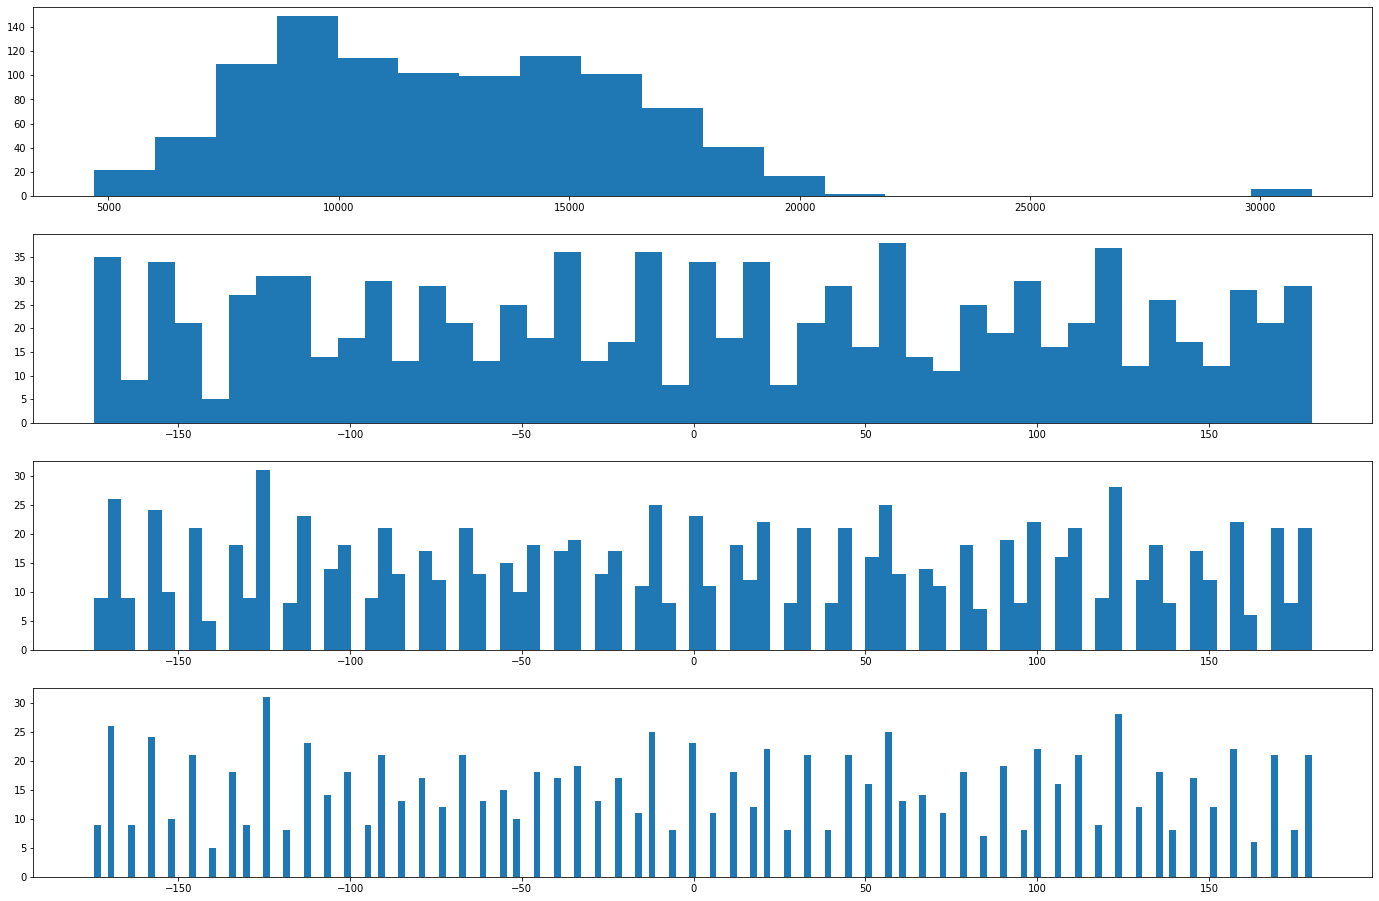

In [134]:
vis.hist_labels(labels)

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_44_beta1=0.60835,beta2=0.91506,latent_dim=20,lr=0.0005_2019-11-03_12-49-07zpj4_zg5/checkpoint_64/epoch_64_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_44_beta1=0.60835,beta2=0.91506,latent_dim=20,lr=0.0005_2019-11-03_12-49-07zpj4_zg5/checkpoint_64/epoch_64_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 20)


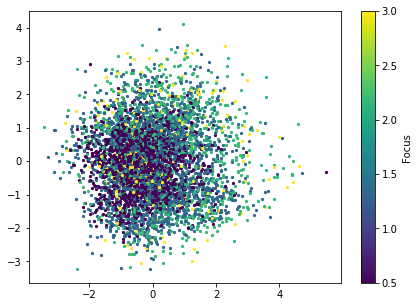

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=5.5, step=0.5))

In [151]:
analyze.reload_libs()

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_30/epoch_30_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_30/epoch_30_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(1000, 10)


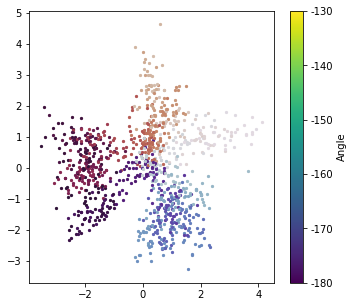

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, SUB_DATASET_PATH, SUB_LABELS_PATH, label_name='theta')
cb = fig.colorbar(im, ax=ax)
angle = cb.set_label('Angle')
yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=180, step=10))

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_30/epoch_30_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_30/epoch_30_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(1000, 10)


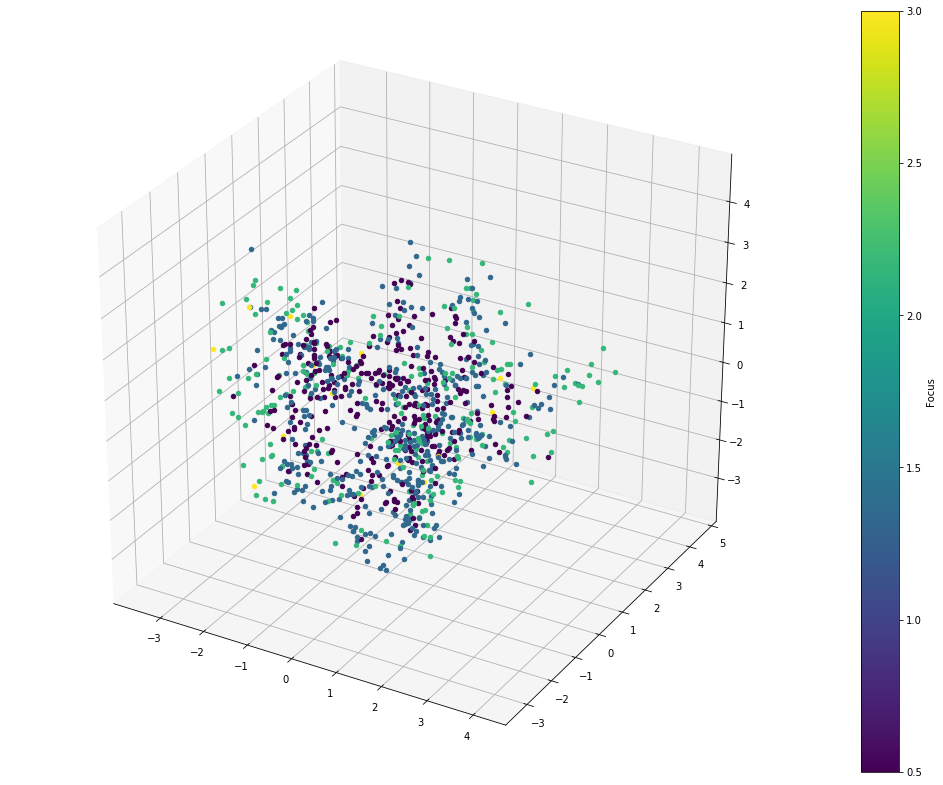

In [158]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, SUB_DATASET_PATH, SUB_LABELS_PATH, n_pc=3)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_10/epoch_10_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_10/epoch_10_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(5119, 10)


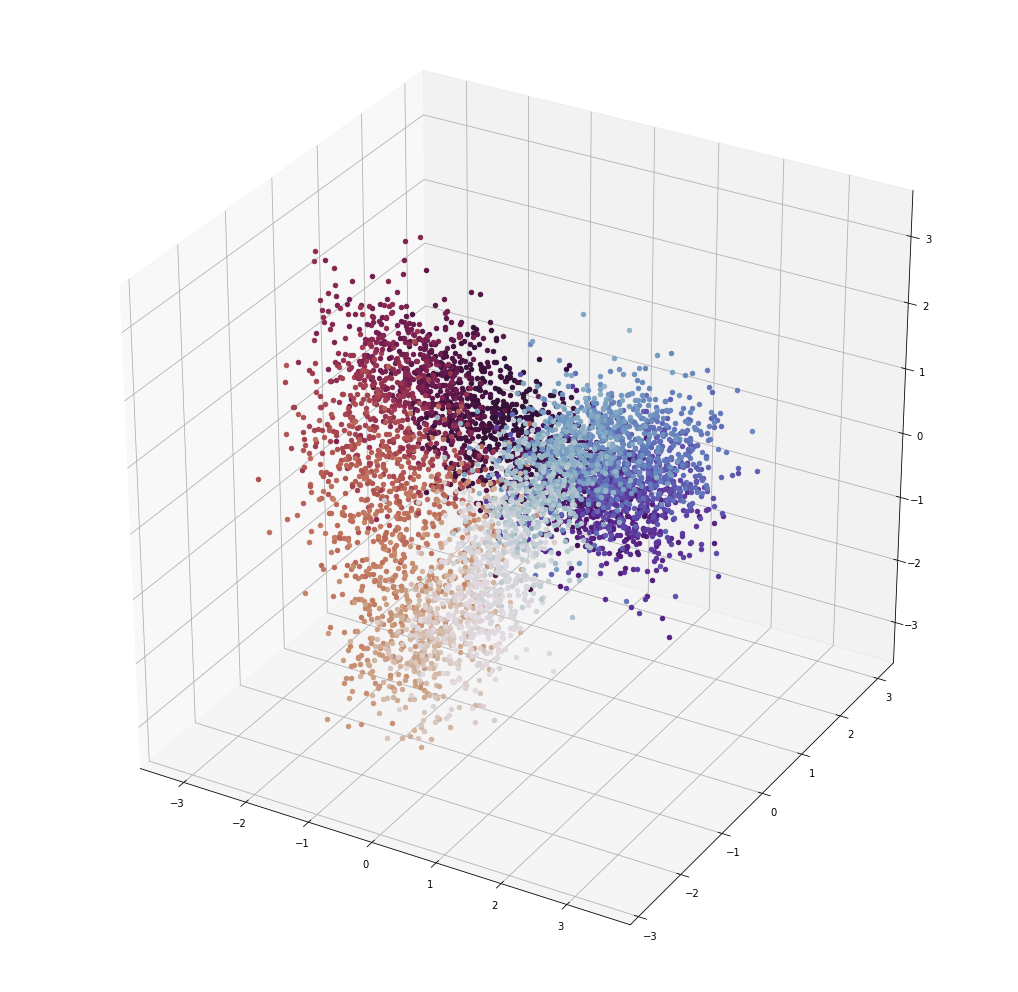

In [149]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3, label_name='theta')

In [86]:
import analyze
importlib.reload(analyze)
analyze.reload_libs()

Loading /gpfs/slac/cryo/fs1/u/nmiolane/data/cryo/train_val_datasets/cryo_exp_128x128.npy
Dataset shape: (5119, 1, 128, 128)
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_10/epoch_10_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_10/epoch_10_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp/Train_3_beta1=0.42435,beta2=0.91534,latent_dim=10,lr=0.0001_2019-11-03_11-51-32mirdqxmj/checkpoint_10/epoch_10_checkpoint.pth.


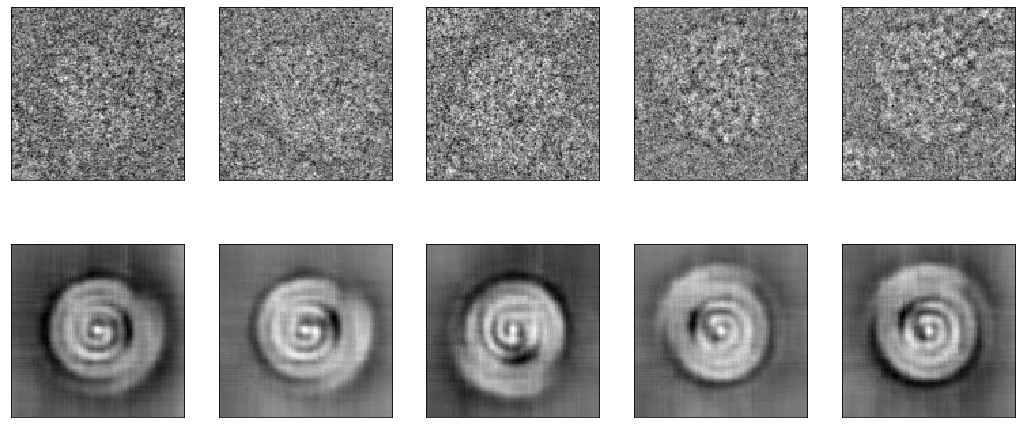

In [150]:
epoch_id = 10
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)